In [14]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Updated sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
# =============================================================================================


In [16]:
# Part I
# ============================== Data Preprocessing ===========================================

import pandas as pd
import numpy as np

# Column names for dataset
col_names = ['x', 'y', 'class']

# Load CSV dataset (no header in file, so header=None)
df = pd.read_csv('3.concertriccir2.csv', header=None, names=col_names)

# Display first 5 rows
print("Dataset Preview:")
print(df.head())

# Extract features (x, y) and labels (class)
X = df[['x', 'y']].values      # feature matrix
y = df['class'].values         # target vector

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


Dataset Preview:
          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0

Shape of X: (500, 2)
Shape of y: (500,)


In [19]:
# ======================== Train–Test Splitting ==================================
# First split full data into:
# 70% -> (X_1, y_1) for training + cross-validation
# 30% -> (X_test, y_test) reserved ONLY for final testing
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Now split the 70% again into:
# 70% -> X_tr, y_tr (actual training set)
# 30% -> X_cv, y_cv (cross-validation set for tuning k)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3, random_state=0)
# =================================================================================


# ======================= Cross-Validation: Find Best k ===========================
for i in range(1, 30, 2):  # odd k values: 1,3,5,...,29

    # Create KNN model with k = i
    knn = KNeighborsClassifier(n_neighbors=i)

    # Train model on training split
    knn.fit(X_tr, y_tr)

    # Predict labels for CV data
    pred = knn.predict(X_cv)

    # Calculate CV accuracy (in %)
    acc = accuracy_score(y_cv, pred) * 100

    print(f"\nCV accuracy for k = {i} is {acc:.2f}%")
# =================================================================================


# ============================ Final Testing =======================================
# Train model again with chosen k (assume k = 1 for final fit)
knn = KNeighborsClassifier(1)
knn.fit(X_tr, y_tr)

# Predict on test set (never seen before)
pred = knn.predict(X_test)

# Test accuracy (in %)
acc = accuracy_score(y_test, pred) * 100

print(f"\n**** Test accuracy for k = 1 is {acc:.2f}%")
# =================================================================================



CV accuracy for k = 1 is 90.48%

CV accuracy for k = 3 is 84.76%

CV accuracy for k = 5 is 87.62%

CV accuracy for k = 7 is 87.62%

CV accuracy for k = 9 is 81.90%

CV accuracy for k = 11 is 83.81%

CV accuracy for k = 13 is 81.90%

CV accuracy for k = 15 is 80.95%

CV accuracy for k = 17 is 79.05%

CV accuracy for k = 19 is 72.38%

CV accuracy for k = 21 is 73.33%

CV accuracy for k = 23 is 72.38%

CV accuracy for k = 25 is 67.62%

CV accuracy for k = 27 is 65.71%

CV accuracy for k = 29 is 64.76%

**** Test accuracy for k = 1 is 90.00%


In [18]:
# ============================== Import Libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# ===========================================================================================


# ============================== Load Dataset ===============================================
# Define column names
col_names = ['x', 'y', 'class']

# Load CSV file (no header in the CSV file)
df = pd.read_csv('3.concertriccir2.csv', header=None, names=col_names)
print("Dataset preview:\n", df.head())

# Feature matrix (X) and target vector (y)
X = df[['x', 'y']].values  # two input features
y = df['class'].values      # class label
# ===========================================================================================


# ======================= Split Dataset into Train / CV / Test ==============================
# First split → 70% training+cv, 30% testing
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Second split → from that 70%, again split into 70% train and 30% CV
X_train, X_cv, y_train, y_cv = train_test_split(X_tmp, y_tmp, test_size=0.3, random_state=0)
# ===========================================================================================


# ========================== Evaluate different k values ====================================
print("\nk\tCV Accuracy\tTest Accuracy")
print("-" * 40)

best_k = None
best_cv_acc = 0

# Loop through all odd k values from 1 to 29
for k in range(1, 30, 2):

    # Create k-NN model with k neighbors
    model = KNeighborsClassifier(n_neighbors=k)

    # Train the model on training set
    model.fit(X_train, y_train)

    # Predict on CV set and calculate accuracy
    cv_pred = model.predict(X_cv)
    cv_acc = accuracy_score(y_cv, cv_pred) * 100

    # Predict on test set and calculate accuracy
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred) * 100

    # Display both results
    print(f"{k}\t{cv_acc:.2f}%\t\t{test_acc:.2f}%")

    # Keep track of the best k value based on CV accuracy
    if cv_acc > best_cv_acc:
        best_cv_acc = cv_acc
        best_k = k

print("\n================ Final Result ==================")
print(f"Best k based on CV accuracy = {best_k}")
print(f"Best CV Accuracy = {best_cv_acc:.2f}%")
print("================================================")


Dataset preview:
           x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0

k	CV Accuracy	Test Accuracy
----------------------------------------
1	90.48%		90.00%
3	84.76%		86.67%
5	87.62%		85.33%
7	87.62%		86.00%
9	81.90%		87.33%
11	83.81%		82.00%
13	81.90%		82.67%
15	80.95%		82.00%
17	79.05%		80.67%
19	72.38%		76.00%
21	73.33%		74.67%
23	72.38%		72.00%
25	67.62%		70.00%
27	65.71%		67.33%
29	64.76%		67.33%

================ Final Result ==================
Best k based on CV accuracy = 1
Best CV Accuracy = 90.48%



The optimal number of neighbors is 3.


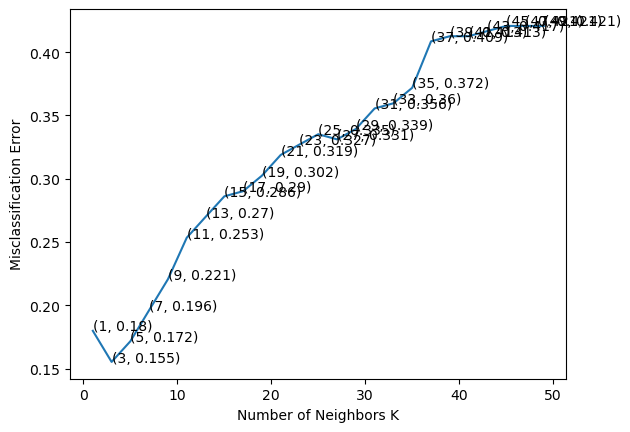

the misclassification error for each k value is :  [0.18  0.155 0.172 0.196 0.221 0.253 0.27  0.286 0.29  0.302 0.319 0.327
 0.335 0.331 0.339 0.356 0.36  0.372 0.409 0.413 0.413 0.417 0.421 0.421
 0.421]


In [20]:


# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [21]:
# ============================== KNN with k = optimal_k ===============================================

knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k)   # create KNN model using best K value

knn_optimal.fit(X_train, y_train)   # train the model on training data

pred = knn_optimal.predict(X_test)  # predict classes for the test set

acc = accuracy_score(y_test, pred) * 100   # compute test accuracy in %

print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))  # display accuracy



The accuracy of the knn classifier for k = 3 is 86.666667%


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier

diabetes = datasets.load_diabetes()     # load the diabetes dataset from sklearn

X = diabetes.data[:150]   # take first 150 rows (features)
y = diabetes.target[:150] # take first 150 rows (target values)

# creating odd list of K for KNN
myList = list(range(0,10))                        # numbers 0 to 9
neighbors = list(filter(lambda x: x % 2 != 0, myList))  # keep only odd values → [1,3,5,7,9]

cv_scores = []      # empty list to store cross-validation scores

# perform 2-fold cross validation for each k in neighbors
for k in neighbors:
    print(k)  # print current K value being tested
    
    knn = KNeighborsClassifier(n_neighbors=k)  # create KNN model with specific K
    
    scores = cross_val_score(knn, X, y, cv=2, scoring='accuracy')  
    # cv=2 means 2-fold cross validation (dataset split into 2 parts)
    # scoring='accuracy' → evaluating accuracy
    
    print(X) # printing X dataset (not necessary, just shows data)
    
    cv_scores.append(scores.mean())  # store average accuracy across folds


1
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [-0.05637009 -0.04464164  0.09295276 ...  0.02545259  0.02606052
   0.04034337]
 [-0.06000263  0.05068012  0.01535029 ... -0.00259226 -0.03074792
  -0.0010777 ]
 [-0.04910502  0.05068012 -0.00512814 ...  0.07120998  0.06123763
  -0.03835666]]
3
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [-0.05637009 -0.04464164  0.09295276 ...  0.02545259  0.02606052
   0.04034337]
 [-0.06000263  0.05068012  0.01535029 ... -0.00259226 -0.03074792
  -0.0010777 ]
 [-0.04910502  0.05068012 -0.00512814 ...  0.07120998  0.06123763
  -0.03835666]]
5
[[ 0.03807

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
